In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score, mean_absolute_error
df = pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


# **Section A – Exploratory Data Analysis**

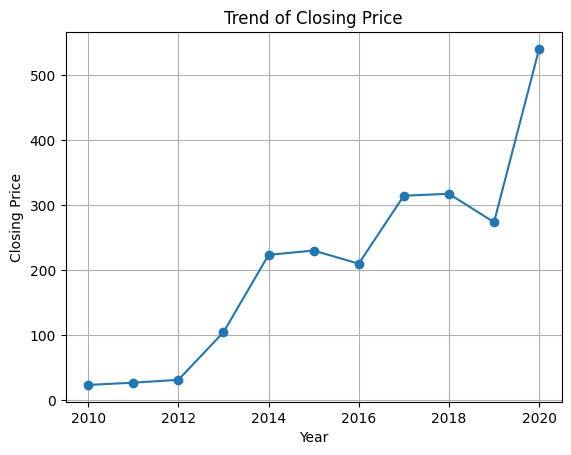

In [ ]:
#Q1

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

yearly = df.groupby('Year')['Close'].mean()

plt.plot(yearly.index, yearly.values , marker = "o")
plt.title("Trend of Closing Price" )
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.grid(True)

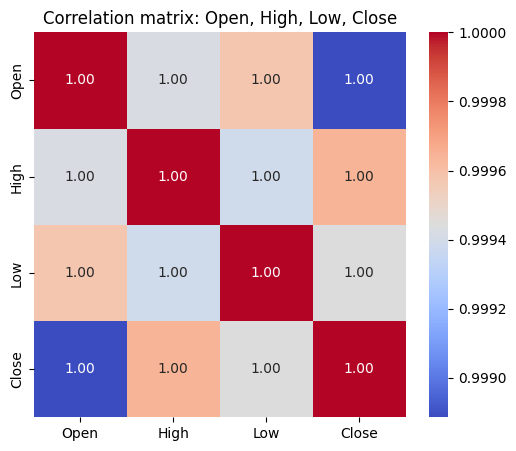

In [ ]:
#Q2
cols = ['Open','High','Low','Close']
corr = df[cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix: Open, High, Low, Close')
plt.show()

In [ ]:
#Q3
max_vol = df.loc[df['Volume'].idxmax()]
min_vol = df.loc[df['Volume'].idxmin()]

print("Highest volume day:")
max_vol[['Date','Open','High','Low','Close','Volume']]

Highest volume day:


,2415
Date,2020-02-03 00:00:00
Open,673.690002
High,786.140015
Low,673.52002
Close,780.0
Volume,47065000


In [ ]:
print("Lowest volume day:")
min_vol[['Date','Open','High','Low','Close','Volume']]

Lowest volume day:


,82
Date,2010-10-25 00:00:00
Open,20.940001
High,20.98
Low,20.73
Close,20.85
Volume,118500


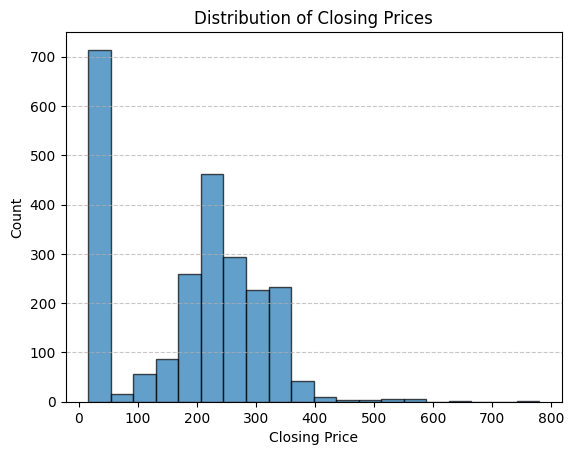

In [ ]:
#Q4

plt.hist(df['Close'], bins=20, edgecolor='black', alpha=0.7)
plt.title("Distribution of Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#Q5
df.isna().sum() # No missing values

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Year,0


# **Section B – Linear Regression**

In [ ]:
#Q1

X = df[['Open','High','Low','Volume']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
#Q2

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Model Evaluation:
Mean Absolute Error (MAE): 1.34
Root Mean Squared Error (RMSE): 2.09
R² Score: 0.9997


In [ ]:
#Q3

coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df.sort_values(by='Coefficient', ascending=False))

         Coefficient
High    9.221136e-01
Low     7.215048e-01
Volume -3.534292e-08
Open   -6.450218e-01


# **Section C – Logistic Regression**

In [ ]:
#Q1

df['Price_Up'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Price_Up
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,2020,1
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,2020,1
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,2020,1
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,2020,1
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000,2020,0


In [ ]:
#Q2

X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Price_Up']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
#Q3
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5145
Confusion Matrix:
 [[  1 235]
 [  0 248]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.01       236
           1       0.51      1.00      0.68       248

    accuracy                           0.51       484
   macro avg       0.76      0.50      0.34       484
weighted avg       0.75      0.51      0.35       484

